In [3]:
#python example to infer document vectors from trained doc2vec model
import gensim.models as g
import codecs

#parameters
model="../doc2vec/model.bin"
output_file="test_vectors.txt"
test = "include directive file include directive file include directive file include directive file using namespace name define directive macro name value define directive macro name value define directive macro name value define directive macro name value typedef type name name name decl_stmt decl type specifier name name init expr literal type number operator literal type number function type name name parameter_list block decl_stmt decl type name name expr_stmt expr call name argument_list argument expr literal type string argument expr operator name while condition expr name operator block decl_stmt decl type name name decl type ref prev name expr_stmt expr call name argument_list argument expr literal type string argument expr operator name argument expr operator name if condition expr call name argument_list argument expr name argument expr name operator literal type number then block expr_stmt expr call name argument_list argument expr literal type string else block expr_stmt expr call name argument_list argument expr literal type string return expr literal type number"


#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

#load model
m = g.Doc2Vec.load(model)
test_docs = test.strip().split()
# print(test_docs)

# infer test vectors
output = open(output_file, "w")
output.write( " ".join([str(x) for x in m.infer_vector(test_docs, alpha=start_alpha, steps=infer_epoch)]) + "\n" )
output.flush()
output.close()

In [ ]:
#python example to train doc2vec model (with or without pre-trained word embeddings)

import gensim.models as g
import logging

#doc2vec parameters
vector_size = 100
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0 #0 = dbow; 1 = dmpv
worker_count = 8 #number of parallel processes

pretrained_emb = None

#input corpus
train_corpus = "data.txt"

#output model
saved_path = "model.bin"

#enable logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#train doc2vec model
docs = g.doc2vec.TaggedLineDocument(train_corpus)
model = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)

#save model
model.save(saved_path)

In [40]:
import pandas as pd
data_path='../Data/Contest1244'
summary_stats=pd.read_csv(data_path+'/standings_statistics.csv',sep='\t',skiprows=1,header=None,names=['ParticipantID','Rank','Country','ProblemA_id','ProblemA_memory','ProblemA_time','ProblemA_language','ProblemB_id','ProblemB_memory','ProblemB_time','ProblemB_language','ProblemC_id','ProblemC_memory','ProblemC_time','ProblemC_language','ProblemD_id','ProblemD_memory','ProblemD_time','ProblemD_language','ProblemE_id','ProblemE_memory','ProblemE_time','ProblemE_language','ProblemF_id','ProblemF_memory','ProblemF_time','ProblemF_language','ProblemG_id','ProblemG_memory','ProblemG_time','ProblemG_language'])
summary_stats.dropna(subset=['ProblemA_id','ProblemB_id', 'ProblemC_id'],inplace=True)
summary_stats.head()

,ParticipantID,Rank,Country,ProblemA_id,ProblemA_memory,ProblemA_time,ProblemA_language,ProblemB_id,ProblemB_memory,ProblemB_time,...,ProblemE_time,ProblemE_language,ProblemF_id,ProblemF_memory,ProblemF_time,ProblemF_language,ProblemG_id,ProblemG_memory,ProblemG_time,ProblemG_language
0,28934535,1,-,62466123,8,31,GNU C++11,62467959,104,31,...,249,GNU C++11,62476907,10804,46,GNU C++11,62480107,3924,420,GNU C++11
1,28925463,2,China,62464793,16,30,GNU C++14,62468158,16,31,...,62,GNU C++14,62486766,3928,46,GNU C++14,62491796,3928,358,GNU C++14
2,28926600,3,China,62464086,8,31,GNU C++11,62464148,828,31,...,31,GNU C++11,62497660,408,31,GNU C++11,62483655,4728,405,GNU C++11
3,28933479,4,-,62466602,8,31,GNU C++11,62469867,12,46,...,498,GNU C++11,62497231,3148,46,GNU C++17,62495208,15664,967,GNU C++11
4,28935245,5,China,62465923,12,31,GNU C++11,62471265,16,31,...,187,GNU C++11,62492999,796,46,GNU C++11,62499859,11756,109,GNU C++11


In [46]:
translation_summary=summary_stats[['ParticipantID','ProblemA_id','ProblemC_id','ProblemB_id']]
translation_summary.head()

,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id
0,28934535,62466123,62471680,62467959
1,28925463,62464793,62473970,62468158
2,28926600,62464086,62478090,62464148
3,28933479,62466602,62477877,62469867
4,28935245,62465923,62474334,62471265


In [47]:
def generate_name(row,column):
    return str(row['ParticipantID'])+'_'+row[column]

translation_summary['A_name']=translation_summary.apply (lambda row: generate_name(row,'ProblemA_id'), axis=1)
translation_summary['B_name']=translation_summary.apply (lambda row: generate_name(row,'ProblemB_id'), axis=1)
translation_summary['C_name']=translation_summary.apply (lambda row: generate_name(row,'ProblemC_id'), axis=1)

/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWa

In [48]:
translation_summary.head()

,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id,A_name,B_name,C_name
0,28934535,62466123,62471680,62467959,28934535_62466123,28934535_62467959,28934535_62471680
1,28925463,62464793,62473970,62468158,28925463_62464793,28925463_62468158,28925463_62473970
2,28926600,62464086,62478090,62464148,28926600_62464086,28926600_62464148,28926600_62478090
3,28933479,62466602,62477877,62469867,28933479_62466602,28933479_62469867,28933479_62477877
4,28935245,62465923,62474334,62471265,28935245_62465923,28935245_62471265,28935245_62474334


In [49]:
def get_vector(model,text,start_alpha=0.01,infer_epoch=1000):
    return model.infer_vector(text, alpha=start_alpha, steps=infer_epoch)

In [121]:
import numpy as np

def get_content(fname):
    f=open(os.path.join(data_path,'all_xml_simplified/'+fname+'.xml'),'r')
    txt=f.read()
    f.close()
    return txt.strip().split()

def generate_vec(row,problem):
    try:
        name=row[problem]
        content=get_content(name)
        vec=get_vector(m,content)
        return vec
    except:
        return None

In [126]:
translation_summary['A_vec']=translation_summary.apply(lambda row: generate_vec(row,'A_name'), axis=1)
translation_summary['B_vec']=translation_summary.apply(lambda row: generate_vec(row,'B_name'), axis=1)
translation_summary['C_vec']=translation_summary.apply(lambda row: generate_vec(row,'C_name'), axis=1)
translation_summary['D_vec']=translation_summary.apply(lambda row: generate_vec(row,'D_name'), axis=1)
translation_summary.head()

/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWit

,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id,A_name,B_name,C_name,A_vec,B_vec,C_vec,D_vec
0,28934535,62466123,62471680,62467959,28934535_62466123,28934535_62467959,28934535_62471680,"[-0.044202138, -0.4283478, 0.117565386, 0.1355...","[-0.17143491, -0.18878877, -0.01847813, 0.1372...","[-0.43411395, -0.25371718, 0.46505305, 0.21757...",None
1,28925463,62464793,62473970,62468158,28925463_62464793,28925463_62468158,28925463_62473970,"[-0.33881015, -0.36599618, -0.0663212, 0.26939...","[-0.100761235, -0.3316756, 0.0237973, 0.101701...","[-0.070138805, -0.018509908, 0.12724714, 0.192...",None
2,28926600,62464086,62478090,62464148,28926600_62464086,28926600_62464148,28926600_62478090,"[-0.14476949, -0.120933644, -0.06732082, 0.100...","[0.16804552, -0.5084876, -0.109157905, 0.19862...",None,None
3,28933479,62466602,62477877,62469867,28933479_62466602,28933479_62469867,28933479_62477877,"[-0.25717404, -0.22128768, 0.50915545, 0.39523...","[-0.16896072, -0.053353813, 0.51749986, 0.3093...","[-0.12867935, 0.1834438, 0.4528377, 0.13189082...",None
4,28935245,62465923,62474334,62471265,28935245_62465923,28935245_62471265,28935245_62474334,"[-0.18804535, -0.44178656, 0.42179662, 0.28983...","[-0.1489841, -0.19800639, 0.34635773, 0.223225...","[-0.20255451, -0.42666727, 0.44303602, 0.26884...",None


In [89]:
import os

for filename in os.listdir(os.path.join())

f=open(os.path.join(data_path,'all_xml_simplified/28935245_62465923.xml'),'r')
txt_a=f.read()
g=open(os.path.join(data_path,'all_xml_simplified/28935245_62474334.xml'),'r')
txt_c=g.read()
h=open(os.path.join(data_path,'all_xml_simplified/28925463_62464793.xml'),'r')
xtx_a=h.read()
i=open(os.path.join(data_path,'all_xml_simplified/28925463_62473970.xml'),'r')
xtx_c=i.read()

In [90]:
txt_a

'pragma directive name name name name name pragma directive name name name name name include directive file define directive macro name value define directive macro name parameter_list parameter type name parameter type name parameter type name value define directive macro name parameter_list parameter type name parameter type name parameter type name value using namespace name typedef type name name name name typedef type name name argument_list type generic argument expr name argument expr name name typedef type name name name function template parameter_list parameter type name name specifier type name name parameter_list parameter decl type name modifier name block expr_stmt expr name operator literal type number decl_stmt decl type name name init expr literal type number decl_stmt decl type name name init expr call name argument_list while condition expr name name argument_list type generic argument expr literal type char operator name literal type char block if condition expr nam

In [91]:
txt_c

'pragma directive name name name name name pragma directive name name name name name include directive file define directive macro name value define directive macro name parameter_list parameter type name parameter type name parameter type name value define directive macro name parameter_list parameter type name parameter type name parameter type name value using namespace name typedef type name name name name typedef type name name argument_list type generic argument expr name argument expr name name typedef type name name name function template parameter_list parameter type name name specifier type name name parameter_list parameter decl type name modifier name block expr_stmt expr name operator literal type number decl_stmt decl type name name init expr literal type number decl_stmt decl type name name init expr call name argument_list while condition expr name name argument_list type generic argument expr literal type char operator name literal type char block if condition expr nam

In [67]:
xtx_a

'include directive file using namespace name function type name name parameter_list block decl_stmt decl type name name decl type ref prev name decl type ref prev name decl type ref prev name decl type ref prev name decl type ref prev name expr_stmt expr name operator name while condition expr name operator block expr_stmt expr name operator name operator name operator name operator name operator name decl_stmt decl type name name init expr ternary condition expr name operator name then expr name operator name operator literal type number else expr name operator name decl_stmt decl type name name init expr ternary condition expr name operator name then expr name operator name operator literal type number else expr name operator name if condition expr name operator name operator name then block type pseudo expr_stmt expr call name argument_list argument expr literal type string else block type pseudo expr_stmt expr call name argument_list argument expr literal type string argument expr 

In [68]:
xtx_c

'include directive file using namespace name function type name name parameter_list block decl_stmt decl type name name name decl type ref prev name decl type ref prev name decl type ref prev name expr_stmt expr name operator name operator name operator name operator name for control init decl type name name name init expr literal type number condition expr name operator name incr expr name operator block if condition expr operator name operator name operator name operator operator name then block type pseudo continue decl_stmt decl type name name name init expr operator name operator name operator name operator operator name decl type ref prev name init expr name operator name operator name if condition expr name operator literal type number operator name operator literal type number then block type pseudo continue expr_stmt expr call name argument_list argument expr literal type string argument expr name argument expr name argument expr name return expr literal type number expr_stmt 

In [92]:
X_A=get_vector(m,txt_a.strip().split())
X_C=get_vector(m,txt_c.strip().split())
Y_A=get_vector(m,xtx_a.strip().split())
Y_C=get_vector(m,xtx_c.strip().split())

In [93]:
X_A.shape

(100,)

In [94]:
from scipy import spatial
result = 1 - spatial.distance.cosine(X_A-Y_A+Y_C, X_C)
result2=1 - spatial.distance.cosine(X_A-Y_A+Y_C, Y_C)
print(result)
print(result2)

0.7553498148918152
0.3996160924434662


In [95]:
1 - spatial.distance.cosine(X_A, X_C)

0.9094702005386353

In [96]:
1 - spatial.distance.cosine(X_A, Y_C)

0.1536000370979309

In [97]:
1 - spatial.distance.cosine(Y_A, X_C)

0.13897062838077545

In [98]:
1 - spatial.distance.cosine(Y_A, Y_C)

0.6145637035369873

In [112]:
translation_summary.shape

(1000, 7)

In [129]:
summary_stats.shape

(1000, 31)

In [194]:
translation_summary.to_csv('translation_vec.csv',index=False)

In [133]:
play=translation_summary.sample(n=100, replace=False, random_state=1)
play.head()

,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id,A_name,B_name,C_name,A_vec,B_vec,C_vec,D_vec
507,28929904,62469085,NO,62477223,28929904_62469085,28929904_62477223,28929904_NO,"[-0.08125514, -0.37661126, 0.029546322, 0.1859...","[0.1261962, -0.28840122, -0.013485637, 0.15798...",None,None
818,28930063,62465870,-,62476063,28930063_62465870,28930063_62476063,28930063_-,"[-0.08194714, -0.24887857, 0.57016236, 0.02721...","[0.11434873, -0.3891947, 0.6832665, -0.2191865...",None,None
452,28913845,62465017,62477000,62470217,28913845_62465017,28913845_62470217,28913845_62477000,"[-0.1267573, -0.38610095, 0.073323935, 0.16539...","[-0.09175491, -0.20303325, 0.08635165, 0.26552...","[-0.22277893, -0.3875344, 0.23395582, 0.207285...",None
368,28895208,62467601,NO,62469511,28895208_62467601,28895208_62469511,28895208_NO,"[0.021988025, -0.24203631, 0.076747015, 0.0115...","[0.053717237, -0.0008431146, 0.053021137, 0.05...",None,None
242,28907862,62475646,NO,62477976,28907862_62475646,28907862_62477976,28907862_NO,"[-0.33135733, -0.19410284, 0.3181004, -0.01235...","[-0.30688453, -0.11905848, 0.31800467, -0.0359...",None,None


In [176]:
def get_translated_vectors(df,vec,col_a,col_b,n_samples):
    translated_vecs=[]
    sample_vecs=df.dropna(subset=[col_a,col_b]).sample(n=n_samples, replace=False)
    for ix,row in sample_vecs.iterrows():
        Y_a=row[col_a]
        Y_b=row[col_b]
        translated_vecs.append(vec-Y_a+Y_b)
    return translated_vecs

In [186]:
def obtain_translated_set(row,col_a,col_b,translation_summary,n_samples=100):
    if row[col_a] is None:
        return [None] * n_samples
    return get_translated_vectors(translation_summary,row[col_a],col_a,col_b,n_samples)

In [192]:
translated_col=translation_summary.apply (lambda row: obtain_translated_set(row,'A_vec','C_vec',translation_summary), axis=1)
translation_summary['translated_set']=translated_col

/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id,A_name,B_name,C_name,A_vec,B_vec,C_vec,D_vec,translated_set
0,28934535,62466123,62471680,62467959,28934535_62466123,28934535_62467959,28934535_62471680,"[-0.044202138, -0.4283478, 0.117565386, 0.1355...","[-0.17143491, -0.18878877, -0.01847813, 0.1372...","[-0.43411395, -0.25371718, 0.46505305, 0.21757...",None,"[[0.24295063, -0.627554, -0.043181967, 0.11134..."
1,28925463,62464793,62473970,62468158,28925463_62464793,28925463_62468158,28925463_62473970,"[-0.33881015, -0.36599618, -0.0663212, 0.26939...","[-0.100761235, -0.3316756, 0.0237973, 0.101701...","[-0.070138805, -0.018509908, 0.12724714, 0.192...",None,"[[-0.3083062, -0.3094286, -0.07265282, 0.02643..."
2,28926600,62464086,62478090,62464148,28926600_62464086,28926600_62464148,28926600_62478090,"[-0.14476949, -0.120933644, -0.06732082, 0.100...","[0.16804552, -0.5084876, -0.109157905, 0.19862...",None,None,"[[0.06597629, -0.17863098, -0.07849556, 0.0400..."
3,28933479,62466602,62477877,62469867,28933479_62466602,28933479_62469867,28933479_62477877,"[-0.25717404, -0.22128768, 0.50915545, 0.39523...","[-0.16896072, -0.053353813, 0.51749986, 0.3093...","[-0.12867935, 0.1834438, 0.4528377, 0.13189082...",None,"[[-0.81643194, -0.2613505, 1.0438676, 0.236594..."
4,28935245,62465923,62474334,62471265,28935245_62465923,28935245_62471265,28935245_62474334,"[-0.18804535, -0.44178656, 0.42179662, 0.28983...","[-0.1489841, -0.19800639, 0.34635773, 0.223225...","[-0.20255451, -0.42666727, 0.44303602, 0.26884...",None,"[[-0.023712628, -0.5649766, 0.5417453, 0.20653..."


In [252]:
from scipy import spatial
import random
def compute_similarity(x,y):
    if x is None or y is None:
        return 0
    return 1 - spatial.distance.cosine(x,y)

def compute_similarity_rank(row,col_b,n_samples=20):
    ranks=[]
    translated_set=row['translated_set']
    for translated_vec in random.sample(translated_set,n_samples):
        comparison_sim=compute_similarity(translated_vec,row[col_b])
        rank=1
        for random_vec in translation_summary[col_b]:
            sim=compute_similarity(random_vec,translated_vec)
            if sim>comparison_sim:
                rank+=1
        ranks.append(rank)
    rank_sum=0
    for rank in ranks:
        rank_sum+=rank
    return (rank_sum/len(ranks))

In [253]:
av_sim_rank=translation_summary.sample(n=70).apply (lambda row: compute_similarity_rank(row,'C_vec'), axis=1)

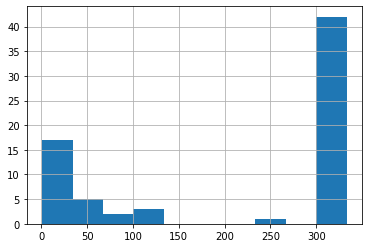

In [254]:
av_sim_rank.hist(bins=10)